In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
from time import time
import numpy as np
import os
import re
import csv
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import warnings
from matplotlib.lines import Line2D

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper")
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
colors = sns.color_palette(cc.glasbey_dark, n_colors = 12)

In [4]:
#loading the dataset

In [3]:
tweets = pickle.load(open("national tweet_details.pkl", "rb"))

In [4]:
tweets.head()

,date,total tweets,total negative tweets,muslim tweets,muslim negative tweets,muslim tablighi tweets,muslim tablighi negative tweets,muslim corona tweets,muslim corona negative tweets,state,datetime,day
0,2020-01-22,802,46,5,1,0,0,0,0,Andhra_Pradesh,2020-01-22,Wednesday
1,2020-01-23,880,41,16,9,0,0,0,0,Andhra_Pradesh,2020-01-23,Thursday
2,2020-01-24,874,38,7,4,0,0,0,0,Andhra_Pradesh,2020-01-24,Friday
3,2020-01-25,812,43,7,1,0,0,0,0,Andhra_Pradesh,2020-01-25,Saturday
4,2020-01-26,936,50,16,8,0,0,0,0,Andhra_Pradesh,2020-01-26,Sunday


In [8]:
#creating dictionary of major events 

In [9]:
events = {"2020-03-22" : "Janata Curfew", "2020-03-25" : "National lockdown", \
          "2020-03-31" : "Tablighi Jamaat declared super spreader event"}

In [10]:
#creating x-axis ticks for the plots

In [12]:
start_date = pd.to_datetime("2020-01-22", format = "%Y-%m-%d")
week_starts = [start_date + pd.Timedelta(i, "W") for i in range(19)]
starts = [str(week.date()) for week in week_starts]
starts

['2020-01-22',
 '2020-01-29',
 '2020-02-05',
 '2020-02-12',
 '2020-02-19',
 '2020-02-26',
 '2020-03-04',
 '2020-03-11',
 '2020-03-18',
 '2020-03-25',
 '2020-04-01',
 '2020-04-08',
 '2020-04-15',
 '2020-04-22',
 '2020-04-29',
 '2020-05-06',
 '2020-05-13',
 '2020-05-20',
 '2020-05-27']

In [14]:
#creating series of interest. is equal to the (number of negative muslim tweets/number of total tweets)*100 
#tracked daily

In [5]:
data = (tweets.groupby("date").sum()["muslim negative tweets"]/tweets.groupby("date").sum()["total tweets"])*100

In [6]:
data

date
2020-01-22    0.961167
2020-01-23    1.183260
2020-01-24    1.012582
2020-01-25    1.101199
2020-01-26    0.903789
2020-01-27    1.189493
2020-01-28    1.015313
2020-01-29    0.795766
2020-01-30    1.088165
2020-01-31    0.999318
2020-02-01    0.548906
2020-02-02    0.747086
2020-02-03    1.147417
2020-02-04    0.861435
2020-02-05    0.655040
2020-02-06    0.861581
2020-02-07    0.742030
2020-02-08    0.579698
2020-02-09    0.768125
2020-02-10    0.792474
2020-02-11    0.679991
2020-02-12    0.590385
2020-02-13    0.510521
2020-02-14    0.395867
2020-02-15    0.600557
2020-02-16    0.639058
2020-02-17    0.607903
2020-02-18    0.827160
2020-02-19    0.669437
2020-02-20    0.949771
2020-02-21    0.894227
2020-02-22    0.757883
2020-02-23    0.917019
2020-02-24    1.698964
2020-02-25    2.884148
2020-02-26    2.641567
2020-02-27    2.309173
2020-02-28    2.169020
2020-02-29    1.807517
2020-03-01    1.545016
2020-03-02    1.291254
2020-03-03    0.985057
2020-03-04    0.941471
2020-0

In [18]:
#training the PELT model with rbf cost function and penalty = 1. Last indetified changepoint is removed because 
#the last index is always the final identified changepoint

In [7]:
algo = rpt.Pelt(model = "rbf")
results = algo.fit_predict(data.values, pen = 1)[:-1]

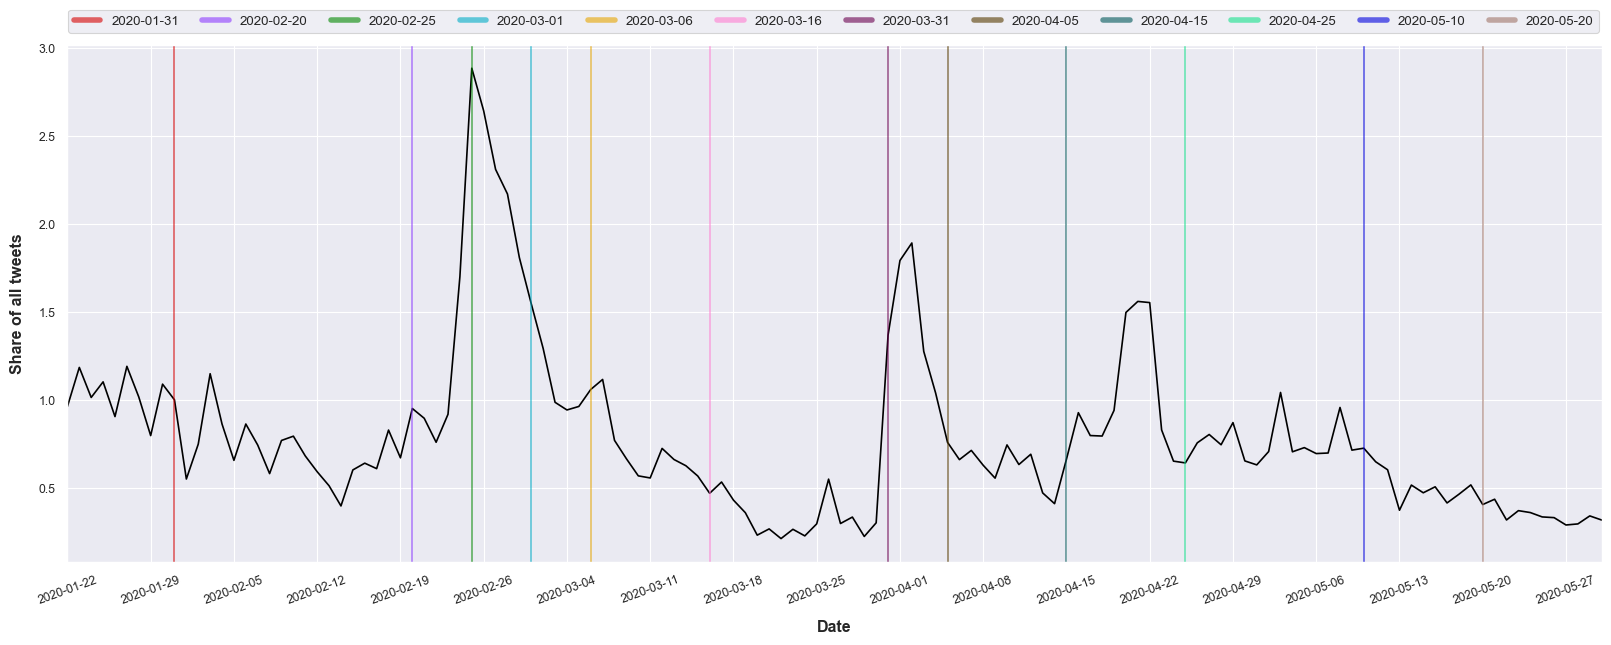

In [11]:
fig, ax = plt.subplots(figsize = (16, 6), layout = "constrained")
ax.plot(data, linestyle = "-", color = "black")
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Share of all tweets", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.set_xlabel("Date", labelpad = 10, fontsize = "large", fontweight = "bold")
legend_lines = []
legend_labels = []
for i, _result in enumerate(results):
    ax.axvline(x = data.index[_result - 1], color = colors[i], linestyle = "-", alpha = 0.6)
    legend_lines.append(Line2D([0], [0], color = colors[i], lw = 4, alpha = 0.6))
    legend_labels.append(data.index[_result - 1])
fig.legend(legend_lines, legend_labels, loc = "lower left", bbox_to_anchor = (0.035, 1.0, 0.965, .02), mode = "expand", \
           ncol = len(results), fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0);

In [12]:
fig.savefig("changepoints_rbf_1.png", bbox_inches = "tight")